<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-20-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-19,1520778,86070,21052.0,1430.0
2020-05-20,1542309,87472,21531.0,1402.0
2020-05-21,1567427,88985,25118.0,1513.0


In [7]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-05-21,CA,86197,1334930,0,4735.0,0.0,1310.0,0.0,0.0,0.0,0.0,B,5/21/2020 00:00,21f1a097d2a21256e6cd031933e78f8813587e4e,2020-05-21T20:00:00Z,3542,0.0,1421127,1421127,1421127,06,106.0,0.0,38867.0,2140.0,41007.0
61,2020-05-20,CA,84057,1296063,0,4681.0,0.0,1345.0,0.0,0.0,0.0,0.0,B,5/20/2020 00:00,6be7a20ccb8deab94178b9db3e70d2c1cf2147c7,2020-05-20T20:00:00Z,3436,0.0,1380120,1380120,1380120,06,102.0,0.0,38542.0,2262.0,40804.0
117,2020-05-19,CA,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,B,5/19/2020 00:00,ad1044e4a2c384424aa492acbe2154e655566e10,2020-05-19T20:00:00Z,3334,0.0,1339316,1339316,1339316,06,32.0,0.0,45279.0,1365.0,46644.0
173,2020-05-18,CA,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,a4c726f97ca716cb19c945927806f45e0bb3cbea,2020-05-18T20:00:00Z,3302,0.0,1292672,1292672,1292672,06,41.0,0.0,55838.0,1591.0,57429.0
229,2020-05-17,CA,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,efe3d2e04569547fc50e7c3d8084f6f4ea4d4cc7,2020-05-17T20:00:00Z,3261,0.0,1235243,1235243,1235243,06,57.0,0.0,54071.0,2046.0,56117.0


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1567427
Total deaths = 88985


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-21,356458,1198597,0,5187.0,76608.0,1695.0,0.0,1345.0,0.0,62826.0,A,5/21/2020 00:00,0db2236bc53fc87b0d78b9fb5a05f949a1923575,2020-05-21T20:00:00Z,23083,76608.0,1555055,1555055,1555055,36,107.0,198.0,47131.0,2088.0,49219.0
NJ,2020-05-21,151472,392802,0,3208.0,0.0,896.0,0.0,700.0,0.0,24236.0,A+,5/21/2020 13:00,fffea701a74faf65d45e1fff0e8c902e6ab8ba27,2020-05-21T20:00:00Z,10843,0.0,544274,544274,544274,34,96.0,0.0,11858.0,1073.0,12931.0
IL,2020-05-21,102686,569334,0,4107.0,0.0,1088.0,0.0,609.0,0.0,0.0,A,5/21/2020 00:00,3d142da9971e8be450fec3a4c0e21c17d8b103a3,2020-05-21T20:00:00Z,4607,0.0,672020,672020,672020,17,82.0,0.0,27039.0,2268.0,29307.0
MA,2020-05-21,90084,411402,0,2396.0,9040.0,647.0,0.0,0.0,0.0,0.0,A,5/21/2020 10:00,0e7bc320a926fcfef12e04e2168f447e94f9cebc,2020-05-21T20:00:00Z,6148,9040.0,501486,501486,501486,25,82.0,143.0,10419.0,1114.0,11533.0
CA,2020-05-21,86197,1334930,0,4735.0,0.0,1310.0,0.0,0.0,0.0,0.0,B,5/21/2020 00:00,21f1a097d2a21256e6cd031933e78f8813587e4e,2020-05-21T20:00:00Z,3542,0.0,1421127,1421127,1421127,06,106.0,0.0,38867.0,2140.0,41007.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
114,2020-05-15,1434477,10738555,81729,24373.0,1478.0,0.915179
115,2020-05-16,1459427,11093390,83015,24950.0,1286.0,0.931097
116,2020-05-17,1480158,11498120,83854,20731.0,839.0,0.944323
117,2020-05-18,1499726,11835174,84640,19568.0,786.0,0.956808
118,2020-05-19,1520778,12234454,86070,21052.0,1430.0,0.970238
119,2020-05-20,1542309,12647791,87472,21531.0,1402.0,0.983975
120,2020-05-21,1567427,13056206,88985,25118.0,1513.0,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
72,2020-05-15,74936,1133906,3108,1772.0,76.0,0.869357
73,2020-05-16,76793,1179126,3204,1857.0,96.0,0.890901
74,2020-05-17,78839,1235243,3261,2046.0,57.0,0.914637
75,2020-05-18,80430,1292672,3302,1591.0,41.0,0.933095
76,2020-05-19,81795,1339316,3334,1365.0,32.0,0.948931
77,2020-05-20,84057,1380120,3436,2262.0,102.0,0.975173
78,2020-05-21,86197,1421127,3542,2140.0,106.0,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-17,1480158,10017962,3449,41108.0,156905.0,10164.0,7003.0,5467.0,593.0,272265.0,83854,156905.0,11501569,11498120,11498120,839.0,1179.0,383999.0,20731.0,404730.0
2020-05-18,1499726,10335448,3596,40933.0,157963.0,10015.0,7064.0,5257.0,602.0,283178.0,84640,157963.0,11838770,11835174,11835174,786.0,1058.0,317486.0,19568.0,337054.0
2020-05-19,1520778,10713676,2944,41174.0,159634.0,9829.0,7217.0,5032.0,606.0,289392.0,86070,159634.0,12237398,12234454,12234454,1430.0,1671.0,378228.0,21052.0,399280.0
2020-05-20,1542309,11105482,2973,40884.0,161616.0,9829.0,7319.0,4911.0,613.0,294312.0,87472,161616.0,12650764,12647791,12647791,1402.0,1982.0,391806.0,21531.0,413337.0
2020-05-21,1567427,11488779,3641,39915.0,166254.0,9090.0,7412.0,4868.0,616.0,298418.0,88985,166254.0,13059847,13056206,13056206,1513.0,4638.0,383297.0,25118.0,408415.0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-17,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,3261,0.0,1235243,1235243,1235243,57.0,0.0,54071.0,2046.0,56117.0
2020-05-18,80430,1212242,0,4391.0,0.0,1325.0,0.0,0.0,0.0,0.0,3302,0.0,1292672,1292672,1292672,41.0,0.0,55838.0,1591.0,57429.0
2020-05-19,81795,1257521,0,4363.0,0.0,1307.0,0.0,0.0,0.0,0.0,3334,0.0,1339316,1339316,1339316,32.0,0.0,45279.0,1365.0,46644.0
2020-05-20,84057,1296063,0,4681.0,0.0,1345.0,0.0,0.0,0.0,0.0,3436,0.0,1380120,1380120,1380120,102.0,0.0,38542.0,2262.0,40804.0
2020-05-21,86197,1334930,0,4735.0,0.0,1310.0,0.0,0.0,0.0,0.0,3542,0.0,1421127,1421127,1421127,106.0,0.0,38867.0,2140.0,41007.0


In [14]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

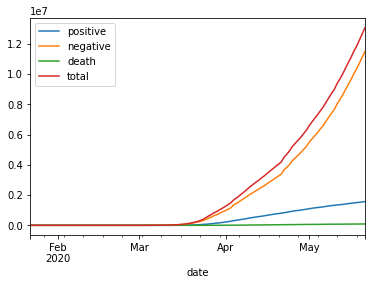

In [15]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

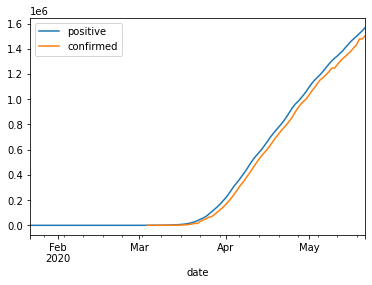

In [16]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [17]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1551853
dead           93439
dtype: int64

In [18]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    85997
dead          3497
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1551853
Russia             308705
Brazil             291579
United Kingdom     249619
Spain              232555
Italy              227364
France             181700
Germany            178473
Turkey             152587
Iran               126949
Name: confirmed, dtype: int64

In [21]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-21,402,39143,0,19.0,0.0,0.0,0.0,0.0,0.0,356.0,C,5/21/2020 00:00,5bc24af23271e1a3dea99c5b7b10ae9ac2260f06,2020-05-21T20:00:00Z,10,0.0,39545,39545,39545,02,0.0,0.0,2500.0,0.0,2500.0
AL,2020-05-21,13119,157620,0,0.0,1528.0,0.0,526.0,0.0,311.0,0.0,B,5/21/2020 00:00,87ebfdf347cf94d0e2e6a2f39c764efa8472452b,2020-05-21T20:00:00Z,529,1528.0,170739,170739,170739,01,12.0,35.0,5914.0,375.0,6289.0
AR,2020-05-21,5458,93818,0,78.0,535.0,0.0,0.0,14.0,101.0,3915.0,A,5/21/2020 00:00,9be3a11ce678c3e9386bd86aeb7b33b5645fd78a,2020-05-21T20:00:00Z,110,535.0,99276,99276,99276,05,3.0,0.0,2563.0,455.0,3018.0
AS,2020-05-21,0,124,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,5/19/2020 00:00,15ed7a7684f942eceb9f62d5e5c296d42def4c19,2020-05-21T20:00:00Z,0,0.0,124,124,124,60,0.0,0.0,0.0,0.0,0.0
AZ,2020-05-21,15315,156312,0,812.0,1830.0,299.0,0.0,197.0,0.0,3872.0,A+,5/21/2020 00:00,88d0f72c2c4dd7f2e477f898eb3c52b2185ab864,2020-05-21T20:00:00Z,763,1830.0,171627,171627,171627,04,16.0,38.0,5774.0,418.0,6192.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [24]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-21,48675,2222,48675,1.000000
FL,2020-05-20,47471,2173,48675,0.975265
FL,2020-05-19,46944,2129,48675,0.964438
FL,2020-05-18,46442,2073,48675,0.954124
FL,2020-05-17,45588,2049,48675,0.936579
FL,2020-05-16,44811,2040,48675,0.920616
FL,2020-05-15,43210,1991,48675,0.887725


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

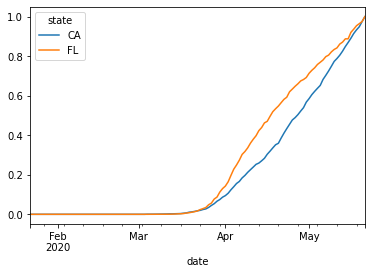

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

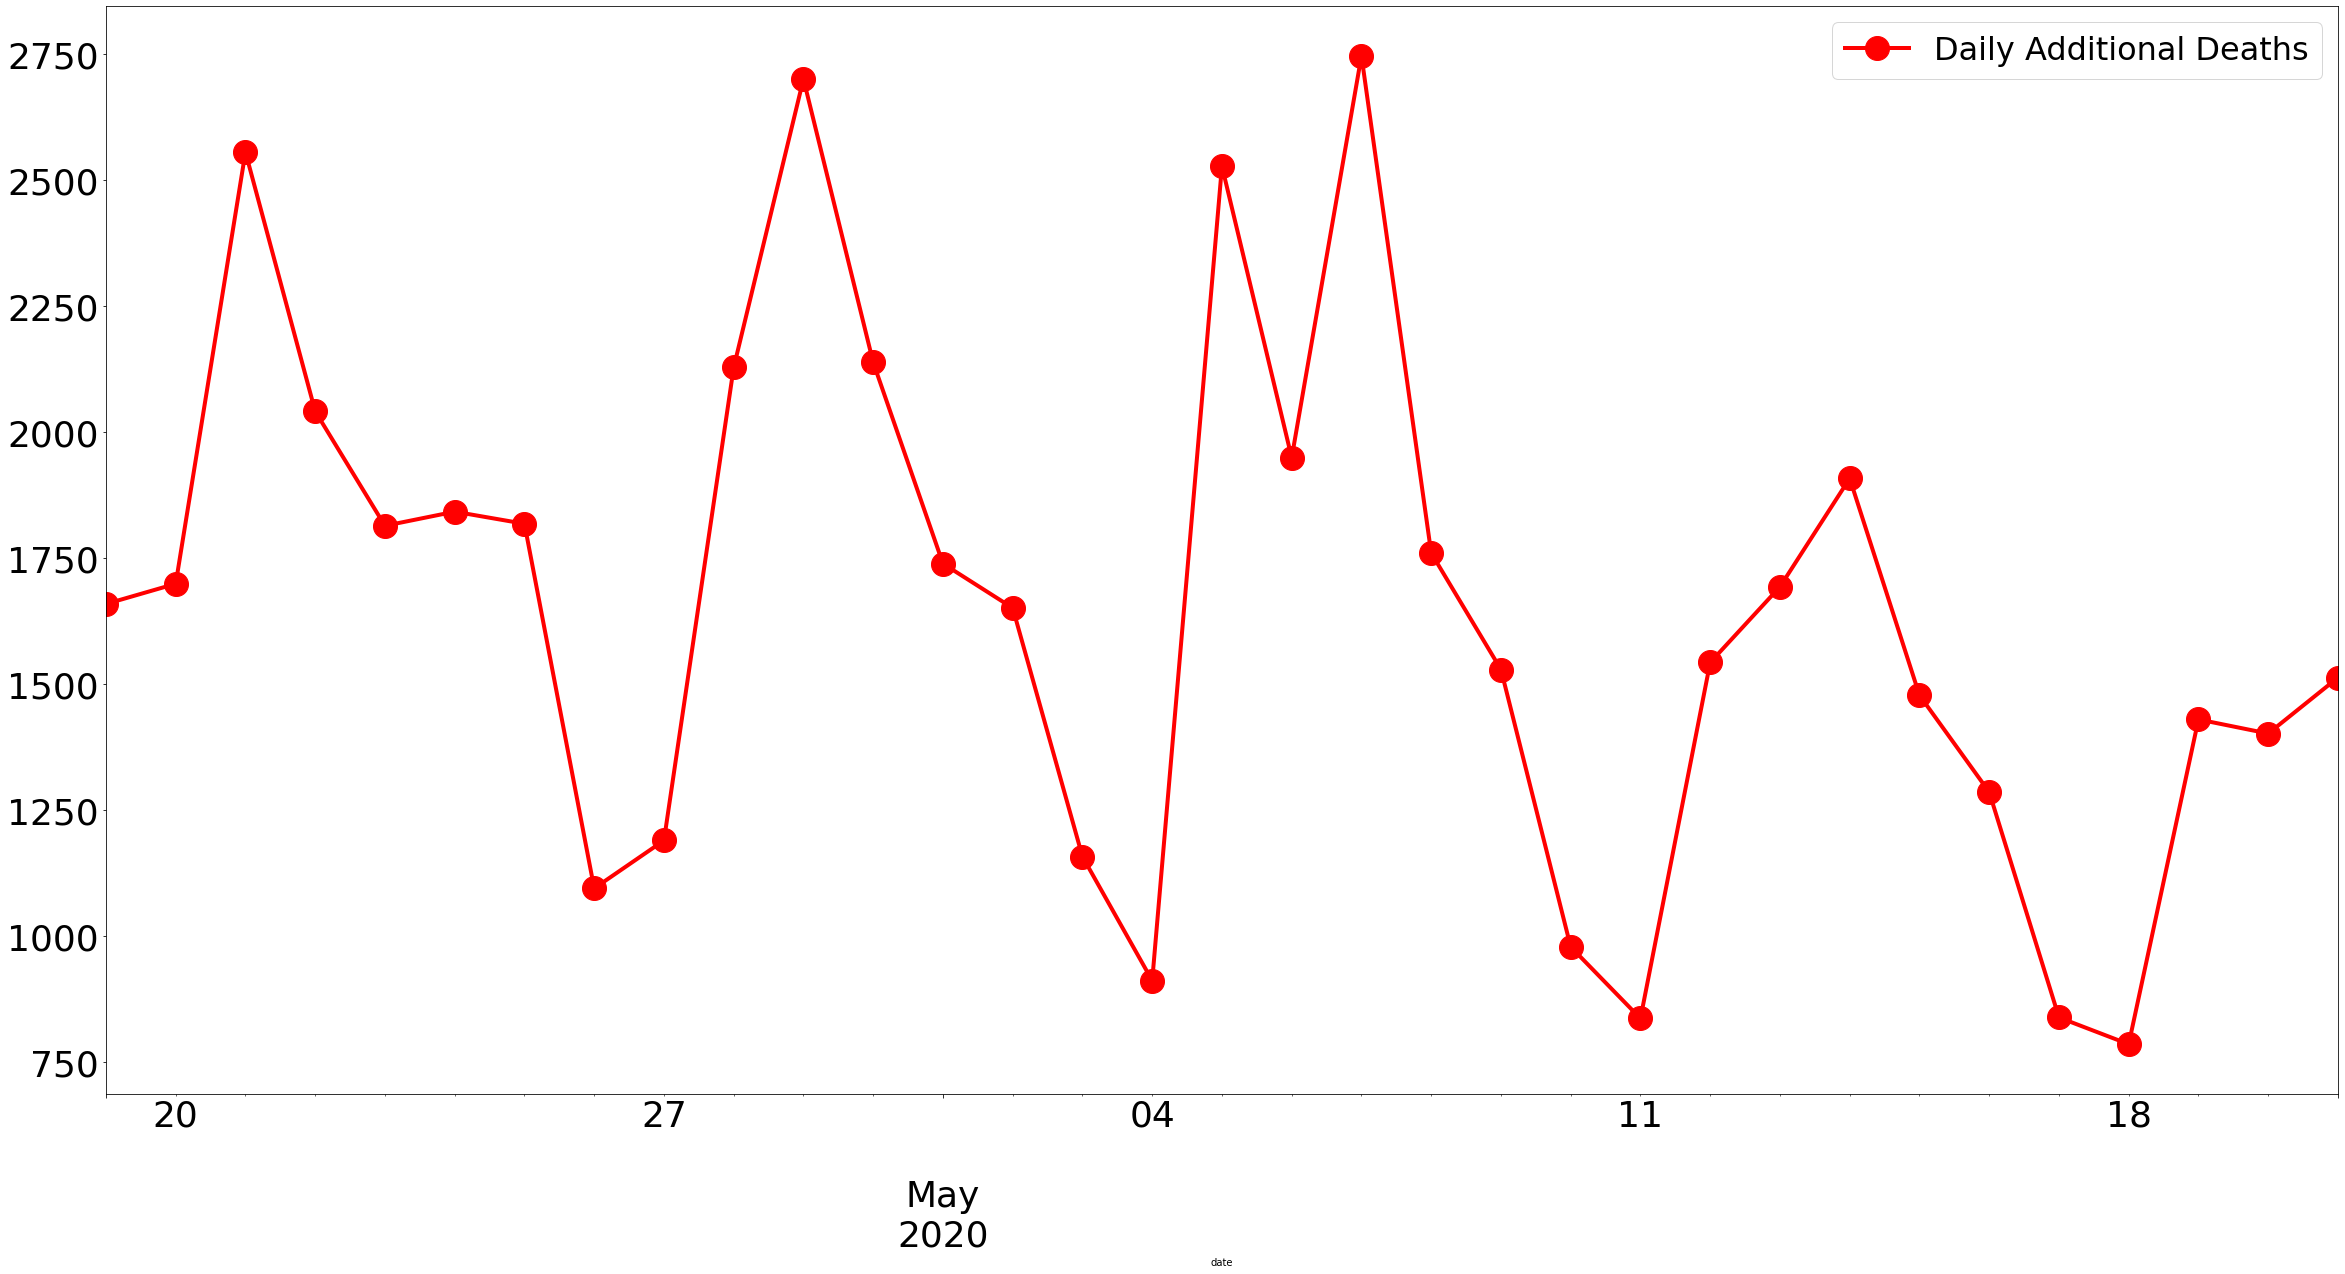

In [28]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


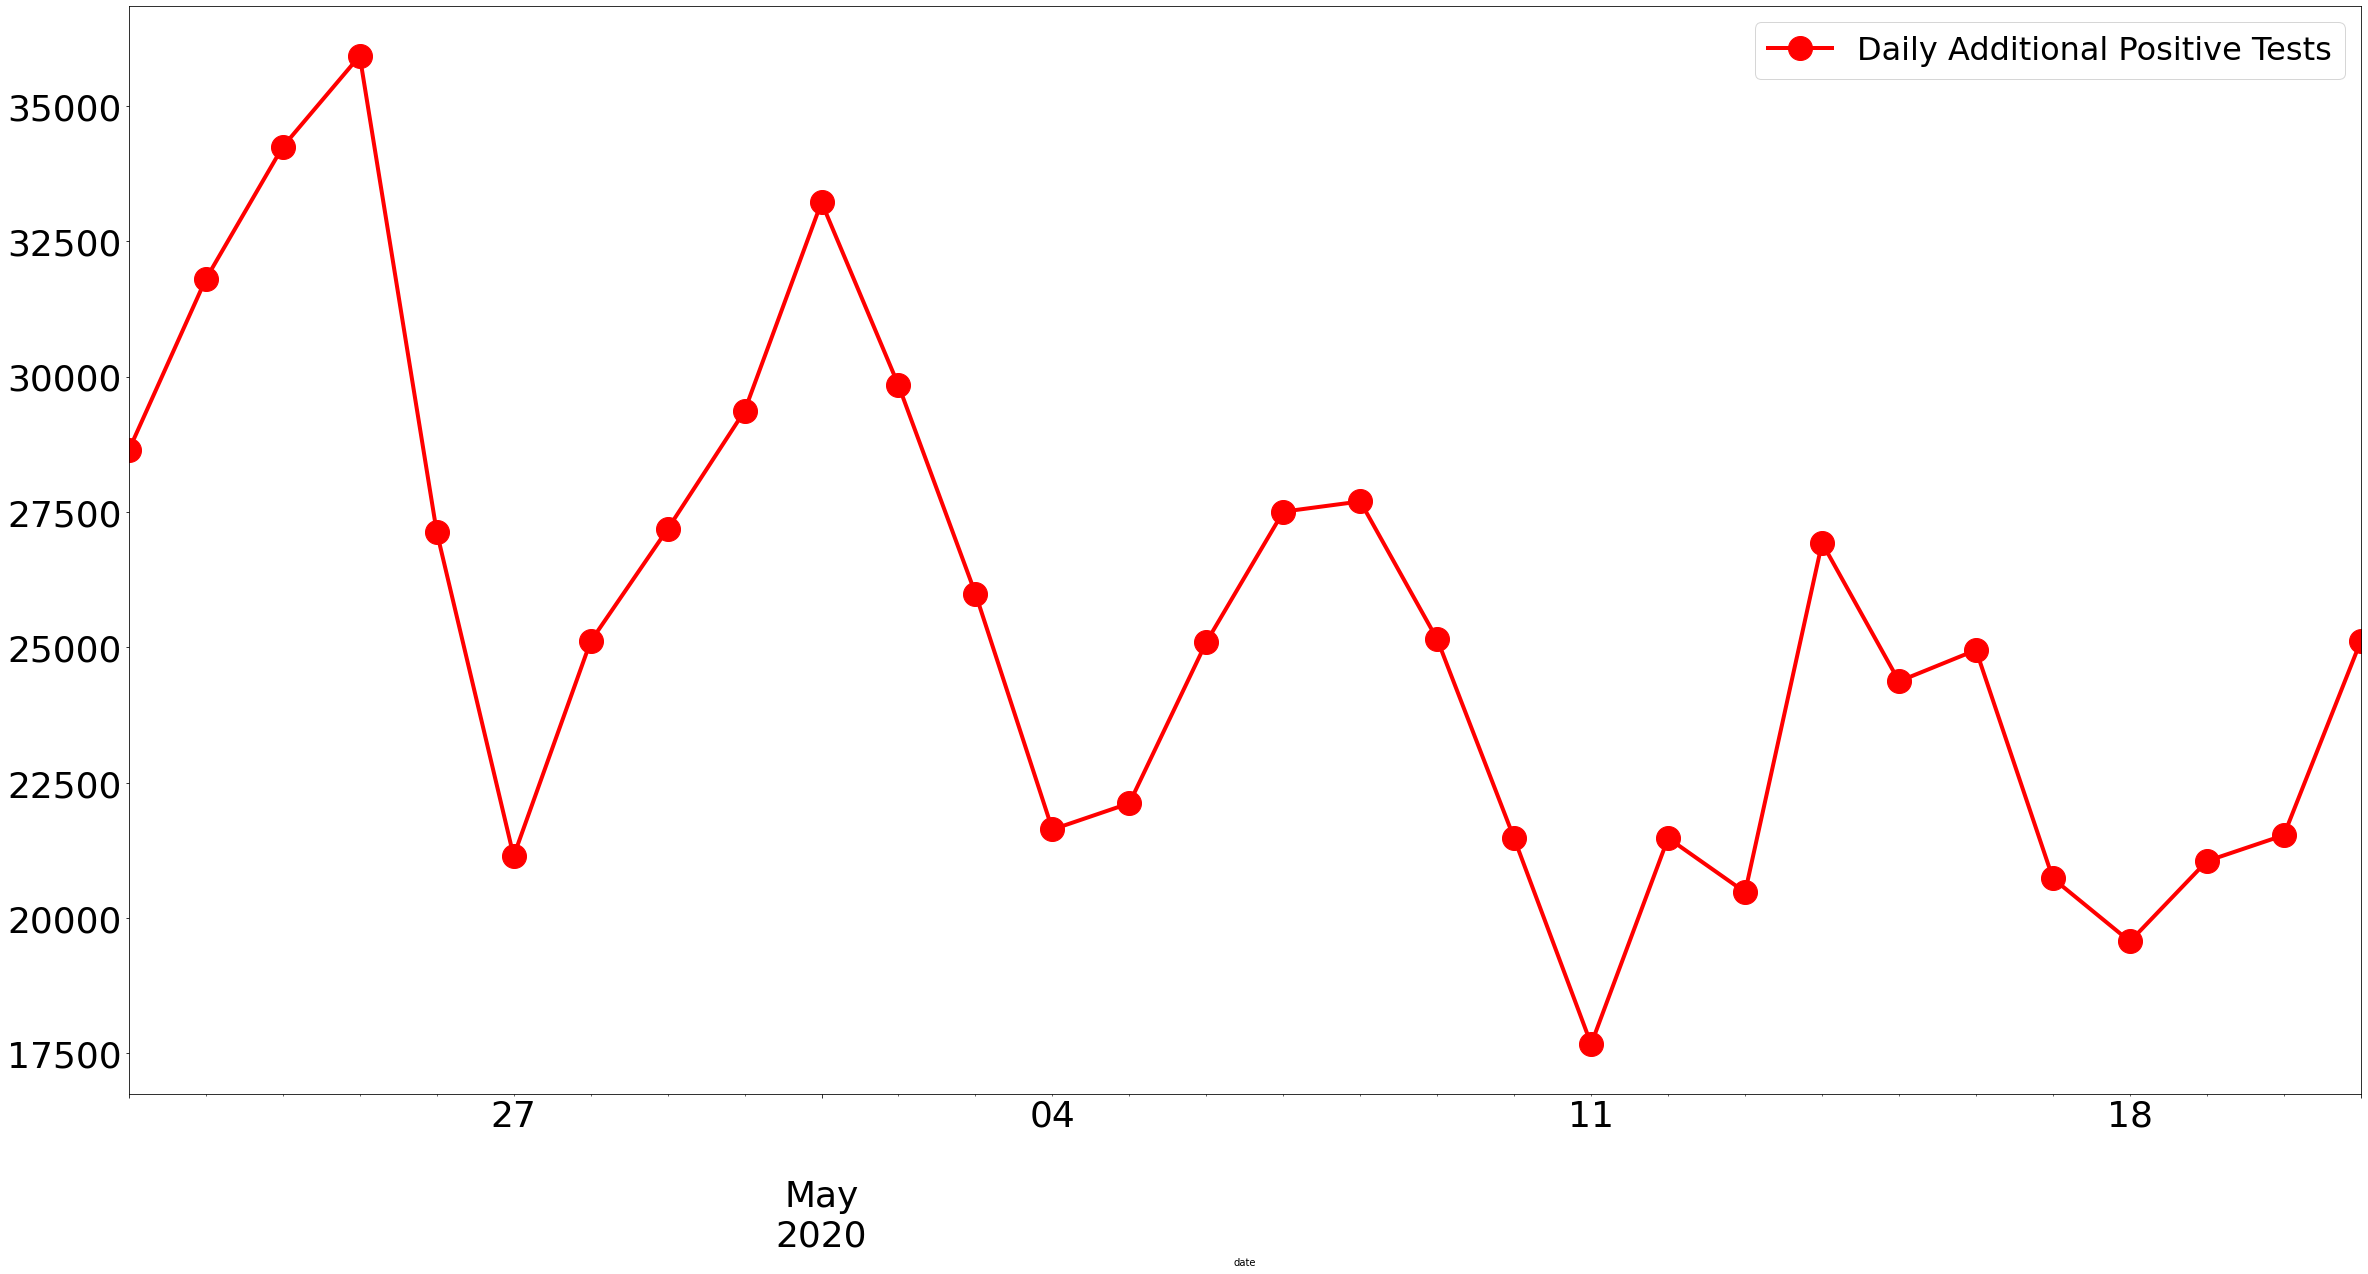

In [29]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


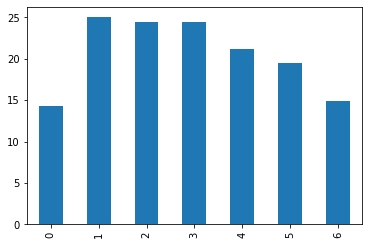

In [32]:
dfDoW.mean().deathIncrease.plot.bar()



In [33]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202015,12523.0,22930.0,834998.0,217011.0,1052009.0
202016,14063.0,21844.0,844351.0,199842.0,1044193.0
202017,12864.0,18239.0,1319345.0,209058.0,1528403.0
202018,12704.0,24854.0,1462984.0,191855.0,1654839.0
202019,12402.0,18984.0,1744284.0,170672.0,1905643.0
202020,9584.0,12125.0,2365472.0,156610.0,2522082.0
202021,5131.0,9349.0,1470817.0,87269.0,1558086.0


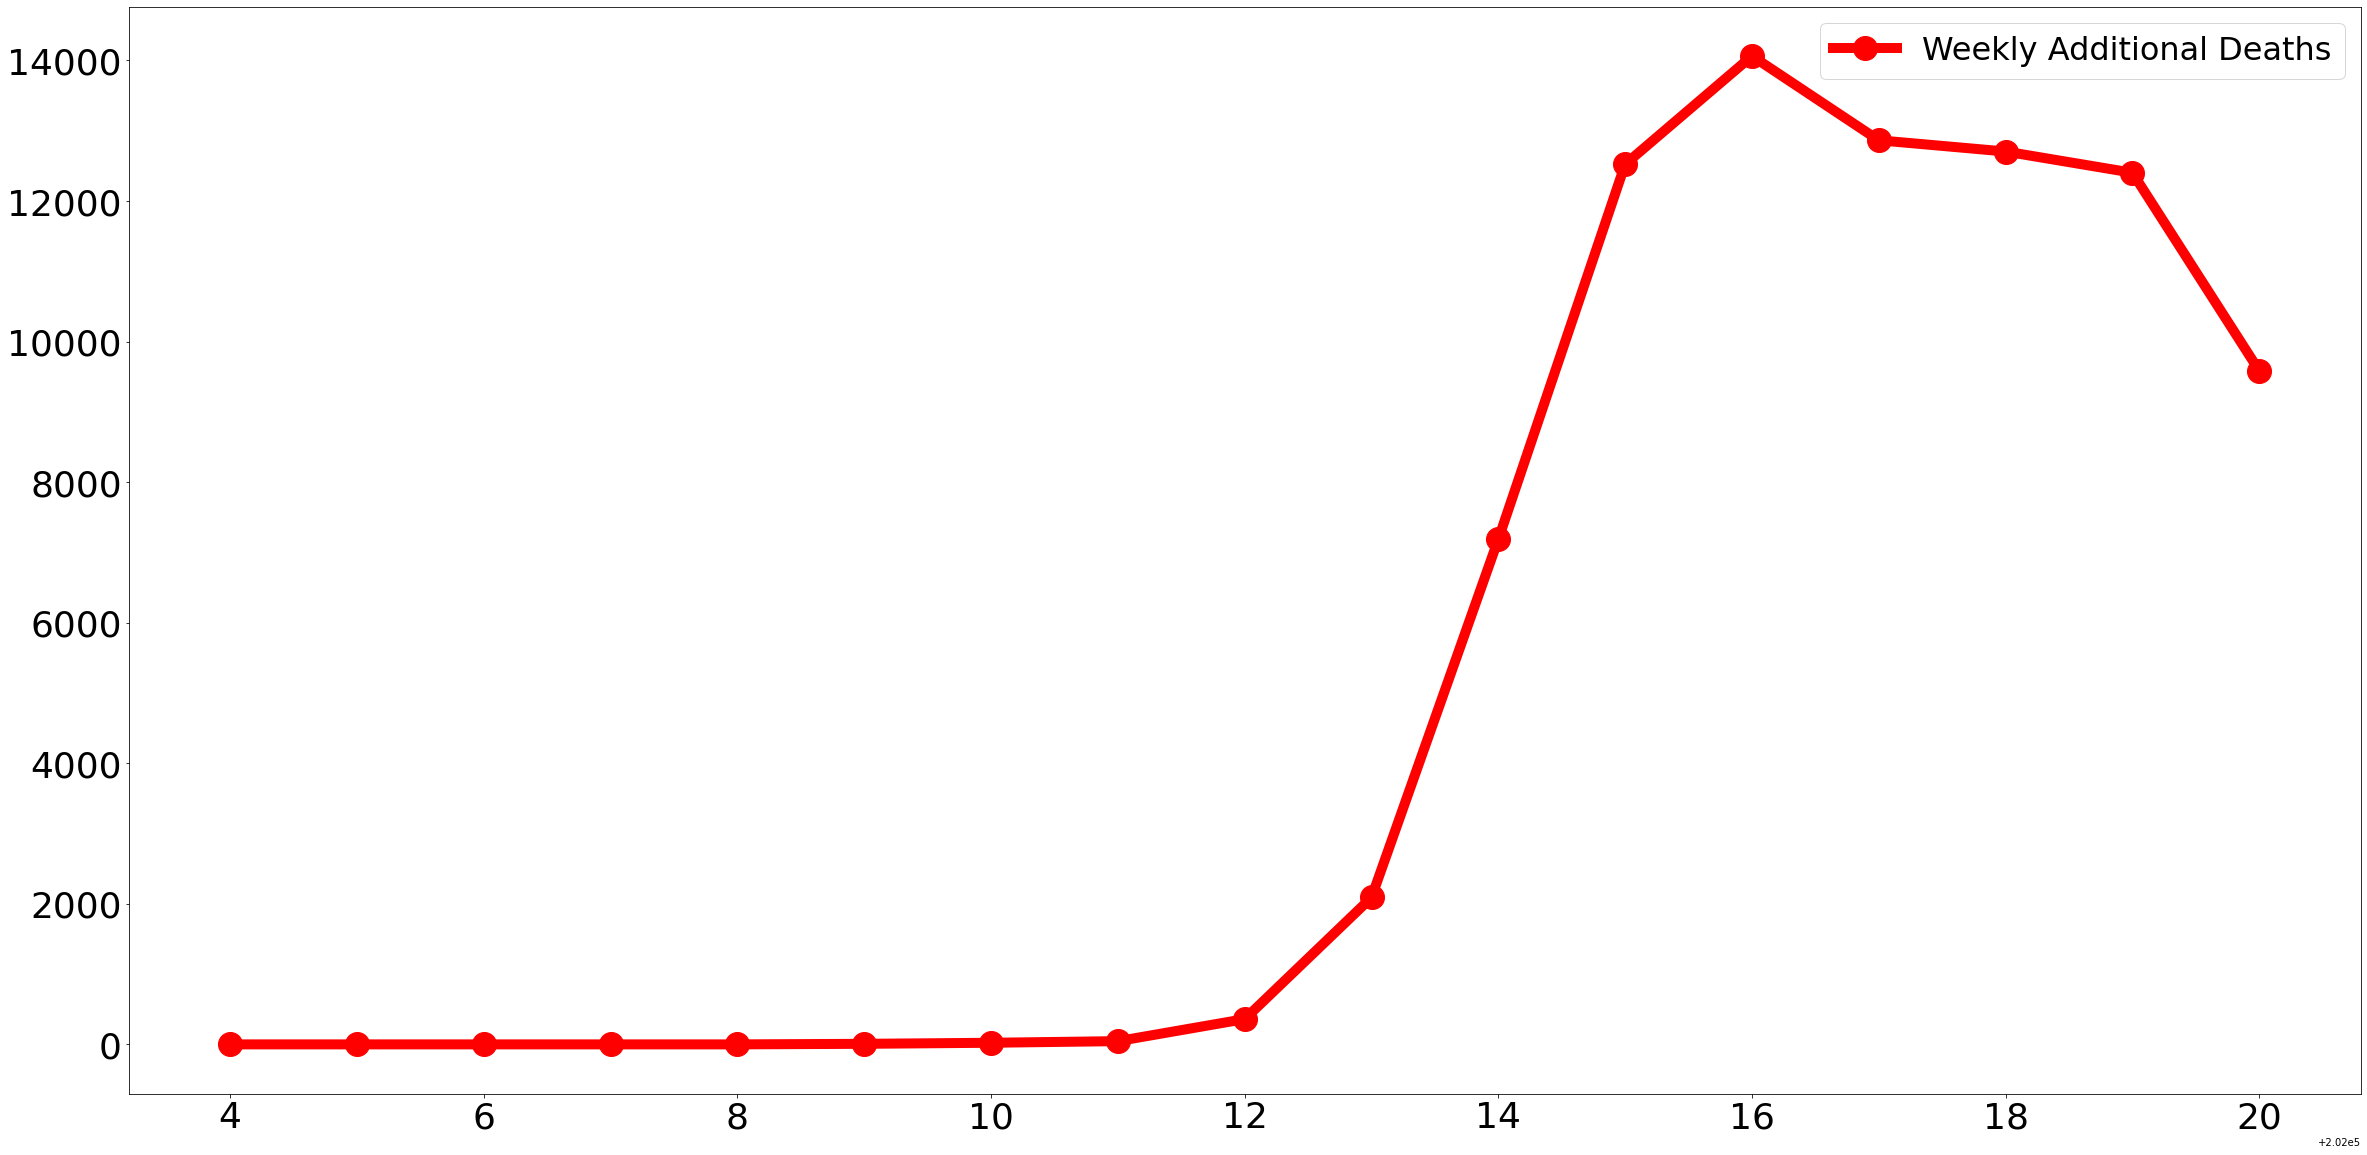

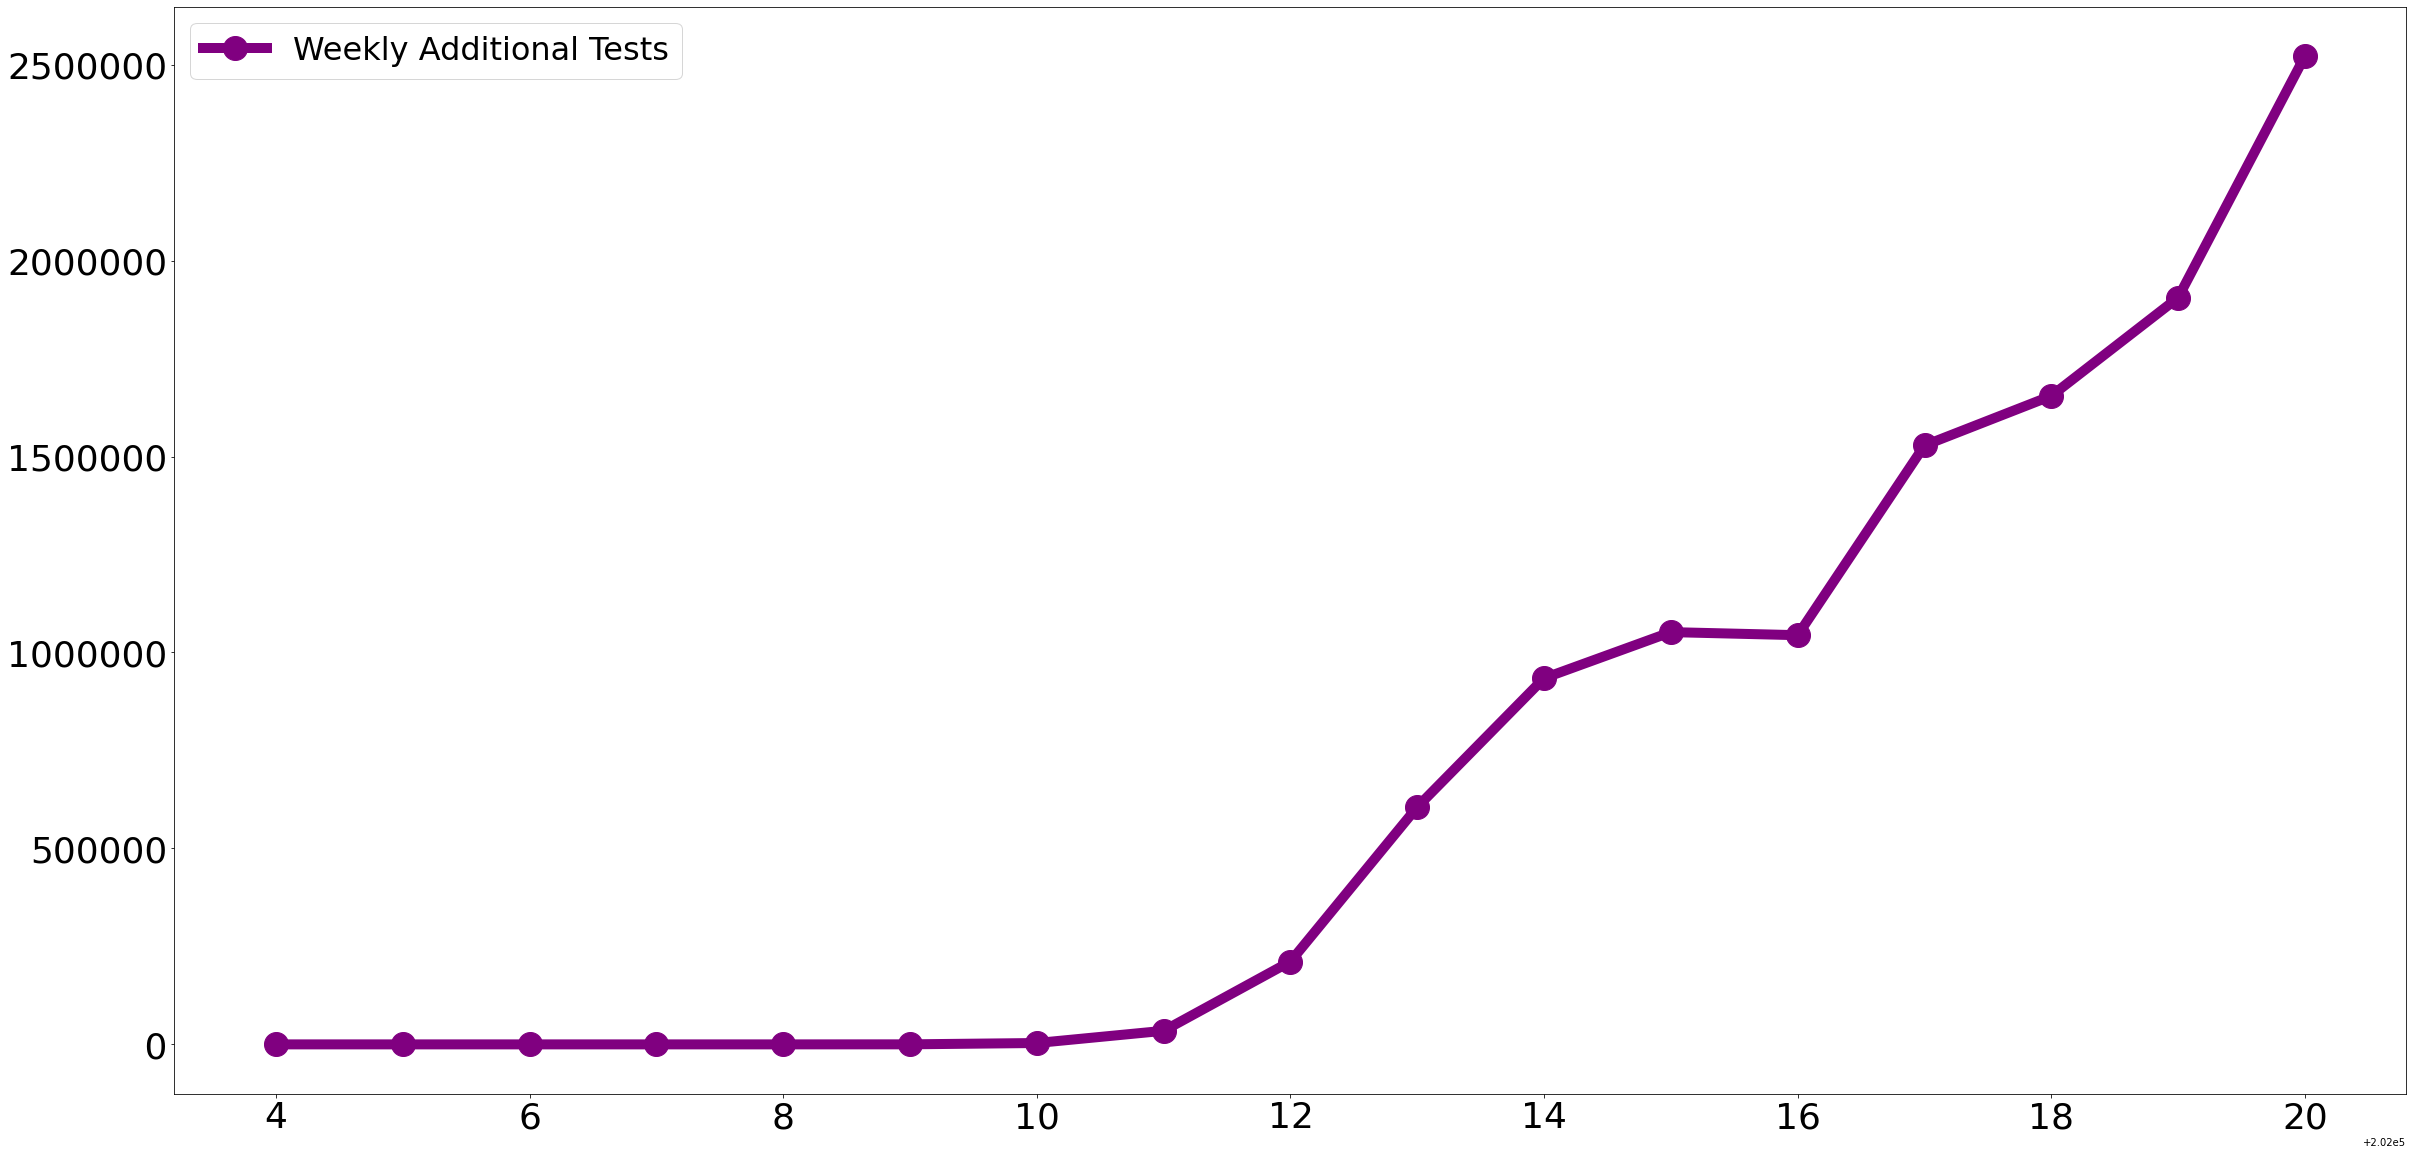

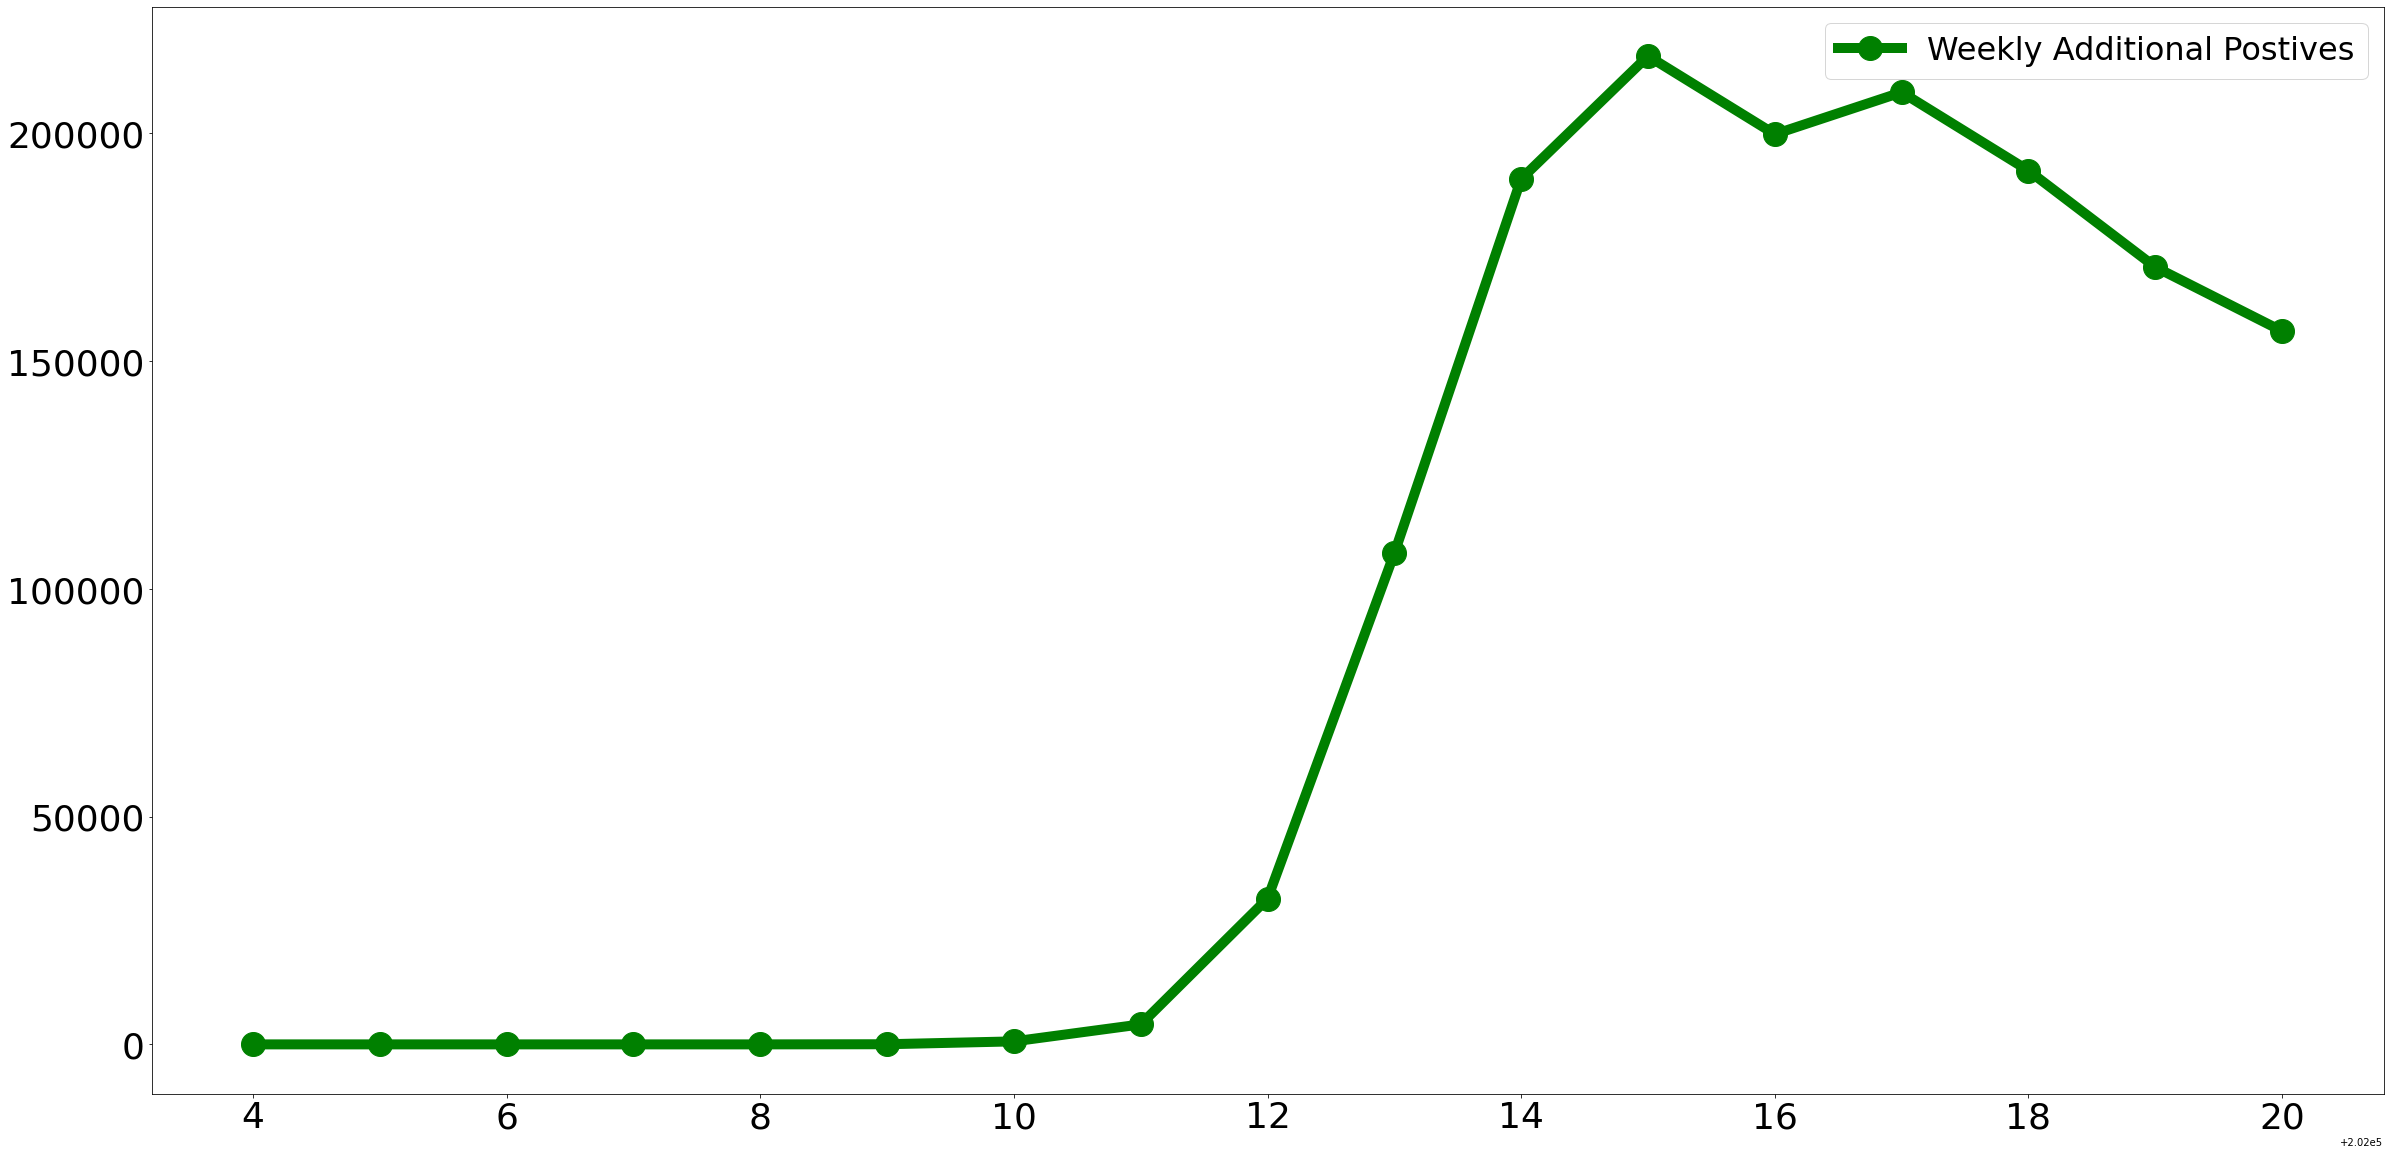

In [34]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

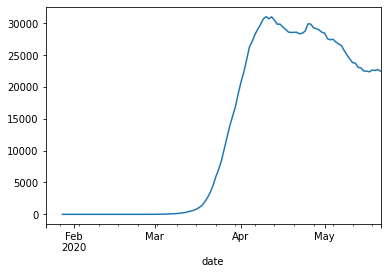

In [35]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

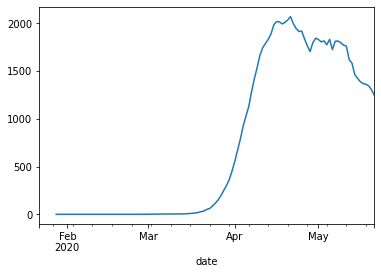

In [36]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

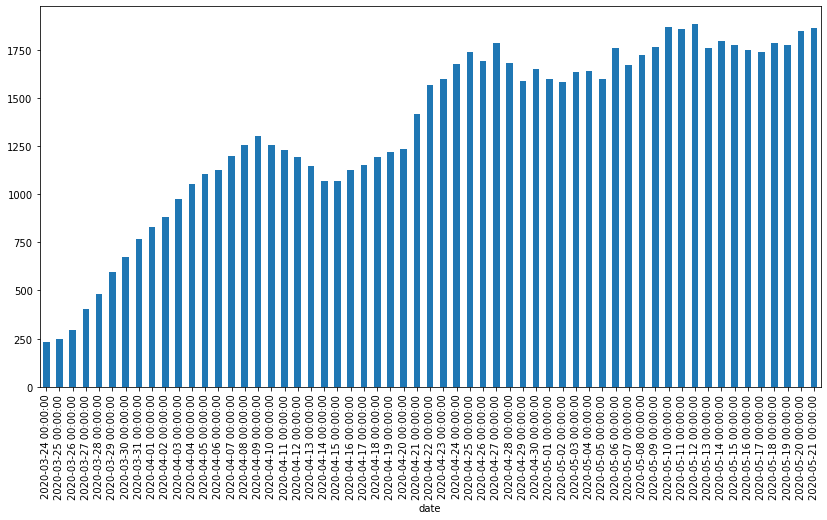

In [38]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


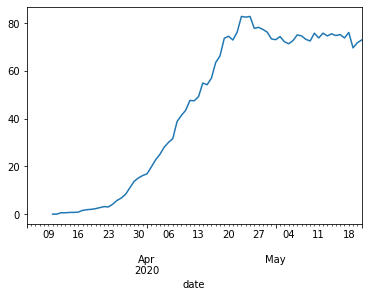

In [39]:
dfCAAvg.deathIncrease.plot.line()

In [40]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
764,FL,2020-05-21,48675,2222,48675,1.000000
765,FL,2020-05-20,47471,2173,48675,0.975265
766,FL,2020-05-19,46944,2129,48675,0.964438
767,FL,2020-05-18,46442,2073,48675,0.954124
768,FL,2020-05-17,45588,2049,48675,0.936579
769,FL,2020-05-16,44811,2040,48675,0.920616
770,FL,2020-05-15,43210,1991,48675,0.887725
771,FL,2020-05-14,43210,1948,48675,0.887725
772,FL,2020-05-13,42402,1898,48675,0.871125
773,FL,2020-05-12,41923,1849,48675,0.861284


In [41]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
1918,MN,2020-05-14,13435,663,18200,0.738187
2369,ND,2020-05-14,1647,40,2229,0.738896


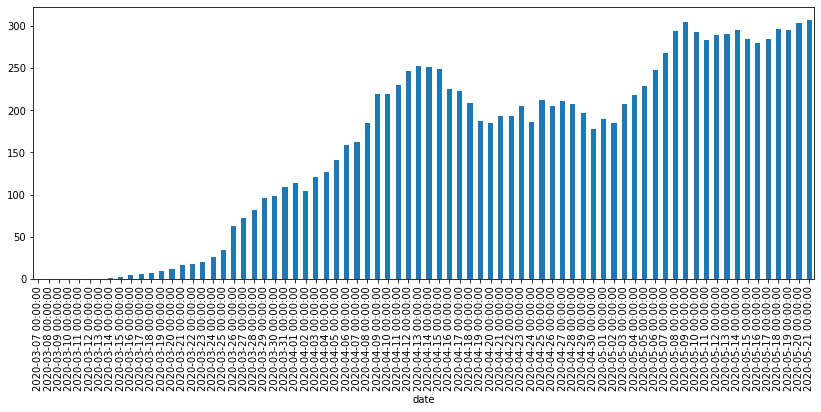

In [92]:

def showStateData(state):
  dfState = dfCovidtracking[dfCovidtracking.state==state].copy()
  dfState.date=pd.to_datetime(dfState.date)
  dfState.set_index('date', inplace=True)

  dfState[::-1].positiveIncrease.rolling(window=7).mean().plot.bar(figsize=(14,5))

showStateData('AL')


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [45]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1567427
negative    11488779
pending         3641
death          88985
total       13059847
dtype: int64
Current Infection Rate 12.001879%
Percentage of US affected: 0.504635%
Observed CFR: 5.677138%
Percentage of US tested/affected: 4.004756%
Projected affected by cir = 39,394,910
Projected killed = 2,236,504


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [53]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.832353,7.993678
NJ,1.705345,6.127700
MA,1.306985,7.275818
RI,1.281055,11.645416
DC,1.103508,5.916551
CT,1.099715,5.686695
DE,0.861194,4.882292
IL,0.810349,5.303263
LA,0.785236,6.569037


In [54]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 3.977646%


In [55]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [57]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18861 entries, 0 to 18860
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         18797 non-null  object 
 1   location                         18861 non-null  object 
 2   date                             18861 non-null  object 
 3   total_cases                      18861 non-null  int64  
 4   new_cases                        18861 non-null  int64  
 5   total_deaths                     18861 non-null  int64  
 6   new_deaths                       18861 non-null  int64  
 7   total_cases_per_million          18491 non-null  float64
 8   new_cases_per_million            18491 non-null  float64
 9   total_deaths_per_million         18491 non-null  float64
 10  new_deaths_per_million           18491 non-null  float64
 11  total_tests                      4957 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [60]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    12233987.0
RUS     7578029.0
ITA     3171719.0
DEU     3147771.0
IND     2512388.0
          ...    
MDV       15280.0
CRI       15050.0
PRY       14646.0
ZWE       14175.0
BOL       10567.0
Name: total_tests, Length: 85, dtype: float64

In [61]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 41465385
Total tests done in USA : 12233987
How many more times has the world tested more than the US: 3.4


In [62]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-19
total_cases                                                            1508598
new_cases                                                                21841
total_deaths                                                             90353
new_deaths                                                                 791
total_cases_per_million                                                4557.66
new_cases_per_million                                                   65.984
total_deaths_per_million                                               272.968
new_deaths_per_million                                                    2.39
total_tests                                                         1.2234e+07
new_tests                                                               399479
new_tests_smoothed                                  

In [63]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-15,27143,1773
2020-05-16,25508,1662
2020-05-17,24487,1186
2020-05-18,18873,808
2020-05-19,21841,791
2020-05-20,19970,1568
2020-05-21,23285,1518


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


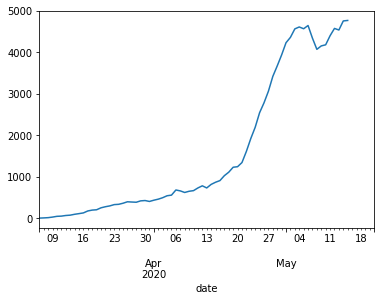

In [65]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [66]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

47471

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [68]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,280.0,859.0,39994.0,4677.0,44671.0
1,397.0,1444.0,62951.0,7143.0,70094.0
2,314.0,1647.0,55933.0,7257.0,63190.0
3,270.0,1029.0,48070.0,5816.0,53886.0
4,266.0,1061.0,57529.0,6785.0,64314.0
5,148.0,928.0,51800.0,4436.0,56236.0
6,79.0,267.0,51049.0,4289.0,55338.0


# Socrata (San Francisco) Data

In [69]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [72]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [75]:
dfresDead.groupby('date').sum()

,case_count
date,
2020-03-17T00:00:00.000,1
2020-03-24T00:00:00.000,1
2020-03-26T00:00:00.000,3
2020-03-27T00:00:00.000,2
2020-03-30T00:00:00.000,1
2020-03-31T00:00:00.000,1
2020-04-01T00:00:00.000,3
2020-04-05T00:00:00.000,1
2020-04-06T00:00:00.000,1


In [76]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail()

,new_cases
date,
2020-05-15T00:00:00.000,35
2020-05-16T00:00:00.000,33
2020-05-17T00:00:00.000,31
2020-05-18T00:00:00.000,6
2020-05-19T00:00:00.000,6


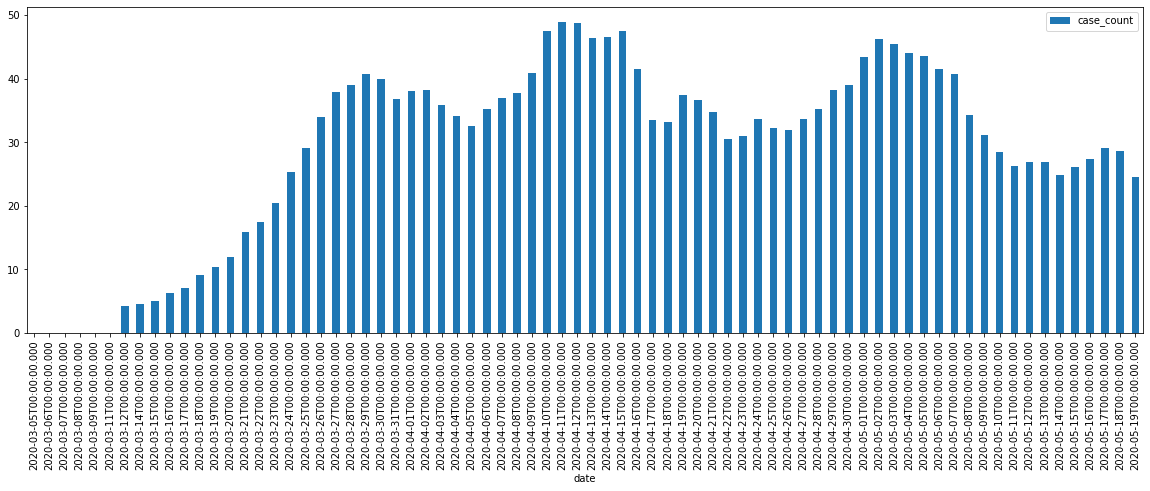

In [77]:
res.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [79]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-17,317,14.0,9080.0,48.0,226.0
2020-05-18,329,14.0,9137.0,48.0,231.0
2020-05-19,336,14.0,9500.0,49.0,232.0
2020-05-20,343,14.0,9889.0,50.0,238.0
2020-05-21,352,14.0,10189.0,50.0,244.0


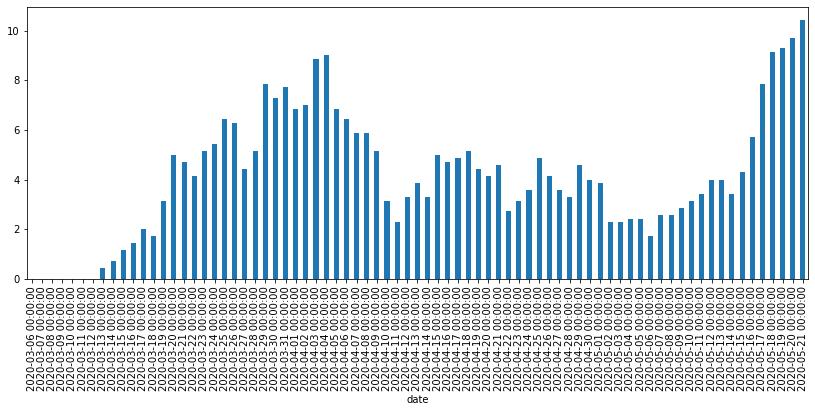

In [80]:
chart= df.positive.diff().rolling(window=7).mean().plot.bar(figsize=(14,5))

In [81]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.14%
Marin Population Tested: 3.92%


In [82]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-17     7.857143
2020-05-18     9.142857
2020-05-19     9.285714
2020-05-20     9.714286
2020-05-21    10.428571
Name: positive, dtype: float64